##### 二维平面生成两个类别随机点

In [2]:
import numpy as np
import tensorflow as tf

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0.0, 3.0],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=num_samples_per_class
).astype('float32')

positive_samples = np.random.multivariate_normal(
    mean=[3.0, 0.0],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=num_samples_per_class
).astype('float32')

# 转换为 TensorFlow 张量
negative_samples = tf.convert_to_tensor(negative_samples)
positive_samples = tf.convert_to_tensor(positive_samples)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype('float32')
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

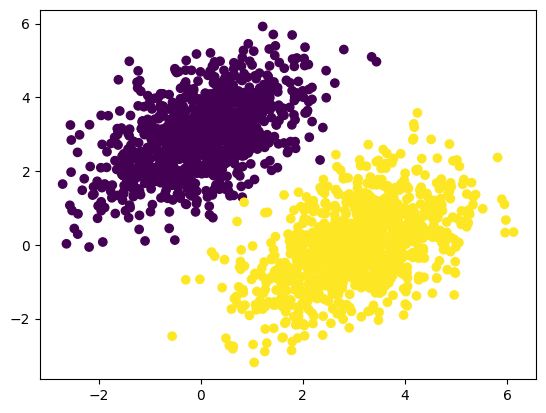

In [4]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [5]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def model(inputs):
    logits = tf.matmul(inputs, W) + b
    return logits

In [6]:
def square_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets - predictions))

In [8]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])
    return loss

In [9]:
for step in range(40):
    loss = training_step(inputs, targets)
    if step % 5 == 0:
        print(f"Step {step}, Loss: {loss.numpy():.4f}")

Step 0, Loss: 0.6713
Step 5, Loss: 0.0606
Step 10, Loss: 0.0473
Step 15, Loss: 0.0389
Step 20, Loss: 0.0337
Step 25, Loss: 0.0304
Step 30, Loss: 0.0283
Step 35, Loss: 0.0270


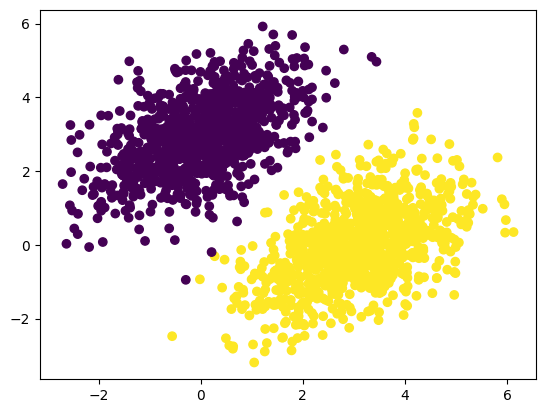

In [10]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions.numpy().flatten() > 0.5)
plt.show()